* Dataset can be found at [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)
* More about K-Means clustering at [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# What does the dataset contain ? 

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['sex'].replace({'male': 0, 'female': 1}, inplace=True)
df['smoker'].replace({'yes': 0, 'no': 1}, inplace=True)
df = pd.concat([df, pd.get_dummies(df['region'], prefix='region')], axis=1)
df.drop(columns=['region'], inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0


# What is the algorithm

# Advantages and Disadvantges of the algorithm

# How is it performed on the dataset 

In [5]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0


In [6]:
X = df.drop(columns=['charges'])
y = df[['charges']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [8]:
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train_std, y_train)

LinearRegression()

In [10]:
regressor.score(X_test_std, y_test) ## Accuracy score on test dataset

0.769611805436901

In [11]:
X_full = ss.transform(X)
predictions = regressor.predict(X_full)
df['Prediction'] = predictions
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,Prediction
0,19,1,27.900,0,0,16884.92400,0,0,0,1,25027.224903
1,18,0,33.770,1,1,1725.55230,0,0,1,0,3669.929369
2,28,0,33.000,3,1,4449.46200,0,0,1,0,6862.478543
3,33,0,22.705,0,1,21984.47061,0,1,0,0,3788.643315
4,32,0,28.880,0,1,3866.85520,0,1,0,0,5681.846592


In [12]:
print("The accuracy score of KNN on the dataset is: {}".format(regressor.score(X_full, y)))

The accuracy score of KNN on the dataset is: 0.7506272930769431


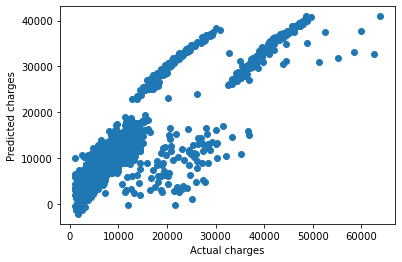

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['charges'].values, df['Prediction'].values)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show();

# Summary

* The features do not seem to be linearly dependency.
* Linear Regression is limited to linearly dependent data.
* The performance of the model could be increased by feature engineering, mapping the data to a linearly separable space.